Laboratorio 2 - Procesamiento Digital de Señales

Alumno: Brian Rodrigo Morales Linares

Pregunta 1)

Parte a)

In [1]:
#Importamos las librerias
import numpy as np
import matplotlib.pyplot as plt

#Tiempo discreto
n=np.arange(10)

#Definimos la función x1[n]
x_1=np.sin(2*np.pi*n/10)

#Definimos la función x2[n]
x_2=np.cos(2*np.pi*n/10)

Parte b)

In [2]:
#Definimos el sistema 1
def sistema_1(x):
  y=np.multiply(x,2)
  return y

#Definimos el sistema 2
def sistema_2(x):
  for i in x:
    y=x*x
  return y

Hacemos uso de las funciones en python para poder tener nuestros dos sistemas que serán aplicada a nuestras señales de entrada x_1 y x_2.

Parte c)

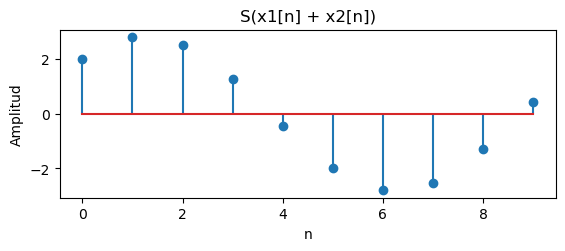

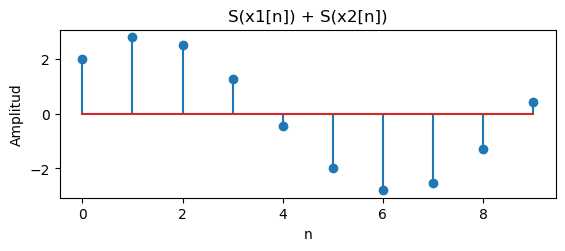

In [3]:
#Para el sistema lineal,osea a*x[n]
#Primero sumamos y luego aplicamos el sistema
x_total=x_1+x_2
y_total_1=sistema_1(x_total)
plt.subplot(2,1,1)
plt.title('S(x1[n] + x2[n])')
plt.stem(n,y_total_1)
plt.xlabel('n')
plt.ylabel('Amplitud')
plt.show()

#Aplicamos el sistema por separado y al final sumamos
y1=sistema_1(x_1)
y2=sistema_1(x_2)
y_total_2=y1+y2
plt.subplot(2,1,2)
plt.title('S(x1[n]) + S(x2[n])')
plt.stem(n,y_total_2)
plt.xlabel('n')
plt.ylabel('Amplitud')
plt.show()

Como podemos observar nuestro primer sistema cumple con la propiedad de linealidad ya que ambas gráficas son iguales, en la primera la salida será igual a la suma de las entradas para luego ser aplicada por el sistema, en la segunda gráfica aplicamos el sistema a cada entrada por separado para luego sumarlas.

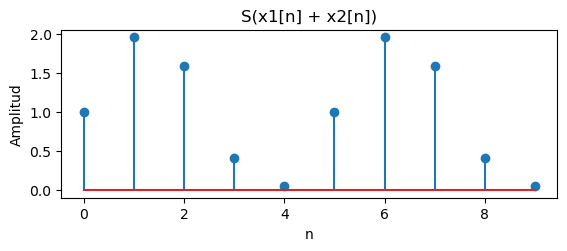

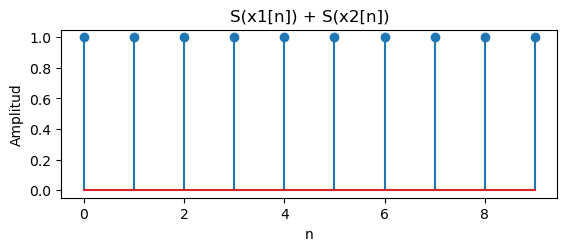

In [4]:
#Para el sistema no lineal (x[n])^2
#Primero sumamos y luego aplicamos el sistema
x_total=x_1+x_2
y_total_1=sistema_2(x_total)
plt.subplot(2,1,1)
plt.title('S(x1[n] + x2[n])')
plt.stem(n,y_total_1)
plt.xlabel('n')
plt.ylabel('Amplitud')
plt.show()

#Aplicamos el sistema por separado y al final sumamos
y1=sistema_2(x_1)
y2=sistema_2(x_2)
y_total_2=y1+y2
plt.subplot(2,1,2)
plt.title('S(x1[n]) + S(x2[n])')
plt.stem(n,y_total_2)
plt.xlabel('n')
plt.ylabel('Amplitud')
plt.show()

En el caso de nuestro segundo sistema podemos notar que no cumple con la propiedad de la linealidad, ya que las gráficas no cuentan con parecido alguno esto debido a que estamos tratando con el sistema (x[n])^2 , el cual obviamente no es lineal, es asi que demostramos de manera gráfica la no linealidad del sistema.

Pregunta 2)

Parte a)

In [9]:
#Definimos la media y desviación estandar
u=0
u1=2
sigma=1
N=400 #Número de muestras
t=np.linspace(-10,10,N) #Vector tiempo con 400 muestras

#Señal Gaussiana
f_t = (1 / np.sqrt(2 * np.pi * sigma**2)) * np.exp(-(t - u)**2 / (2 * sigma**2))

Debemos tener en cuenta que al trabajar con señales gaussianas, debemos tener como dato tanto la media como la desviación estandar, donde la media(u) representará el valor en el tiempo donde se encuentra el pico de la campana gaussiana y la desviación estandar el ancho de nuestra señal.

Parte b)

Es asi que si nos piden desplazar nuestra señal gaussiana original 2 segundos , lo único que deberiamos realizar es cambiar el valor de la media a 2 para obtener nuestra señal desplazada, a continuación se hara el ploteo de las señales donde se verifica el desplazamiento.

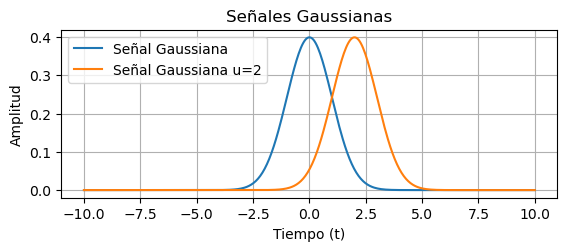

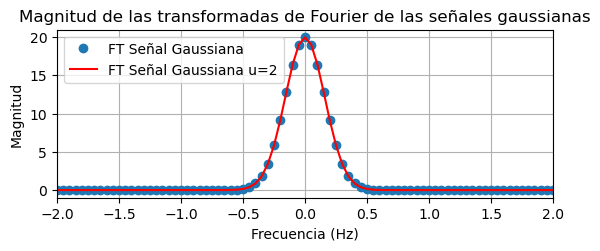

In [10]:
#Señal Gaussiana desplazada 2 segundos
f_t1 = (1 / np.sqrt(2 * np.pi * sigma**2)) * np.exp(-(t - u1)**2 / (2 * sigma**2))

#Plotemos ambas señales
plt.subplot(2,1,1)
plt.plot(t, f_t,label='Señal Gaussiana')
plt.plot(t, f_t1,label='Señal Gaussiana u=2')
plt.title('Señales Gaussianas')
plt.xlabel('Tiempo (t)')
plt.ylabel('Amplitud')
plt.grid('on')
plt.legend(loc='upper left')
plt.show()

#Definimos el periodo y frecuencia de muestreo
T=20/N
fs=1/T

#Hallamos la transformada de fourier de las respectivas señales
fourier_1=np.fft.fftshift(np.fft.fft(f_t))
fourier_2=np.fft.fftshift(np.fft.fft(f_t1))
frecuencia=(np.arange(N) - N/2)*fs/N

#Ploteamos la comparación entre las transformadas de ambas señales
plt.subplot(2,1,2)
plt.plot(frecuencia, np.abs(fourier_1),'o',label='FT Señal Gaussiana')
plt.plot(frecuencia, np.abs(fourier_2),'r',label='FT Señal Gaussiana u=2')
plt.title('Magnitud de las transformadas de Fourier de las señales gaussianas')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.xlim([-2,2])
plt.grid('on')
plt.legend(loc='upper left')
plt.show()

En el primer gráfica se puede verificar la señal gaussiana desplazada.
Como bien sabemos la transformada de fourier de una señal gaussiana es otra señal gaussiana, es por ello que en nuestro segundo plot obtenemos la magnitud de ambas transformadas de fourier tanto de la señal gaussiana como la desplazada, lo cual tiene mucho sentido que sus magnitudes sean iguales ya que como bien sabemos al desplazar en el tiempo lo que obtenemos al realizar la transformada de fourier es la transformada de fourier de la señal original multiplicada por el valor de una componente exponencial igual a e^-jwot.
Es por ello que si deseamos notar la diferencia deberiamos plotear la fase para corroborar la correcta implementación de la transformada.

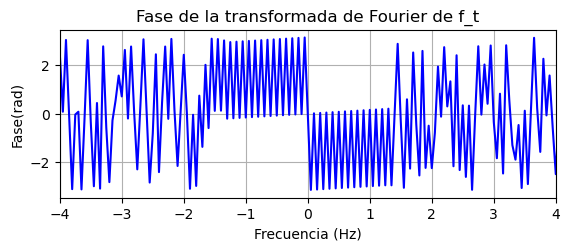

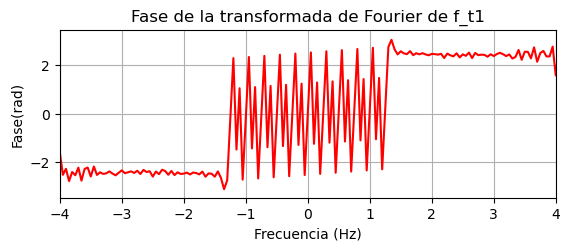

In [13]:
#Ploteamos la comparación entre las fases de ambas señales
plt.subplot(2,1,1)
plt.plot(frecuencia, np.angle(fourier_1),'b')
plt.title('Fase de la transformada de Fourier de f_t')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Fase(rad)')
plt.xlim([-4,4])
plt.grid('on')
plt.show()


plt.subplot(2,1,1)
plt.plot(frecuencia, np.angle(fourier_2),'r')
plt.title('Fase de la transformada de Fourier de f_t1')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Fase(rad)')
plt.xlim([-4,4])
plt.grid('on')
plt.show()

Como habiamos mencionado anteriormente, existe una diferencia notoria en la fase de ambas señales esto debido a la multiplicación de la componente exponencial en el dominio de la frecuencia.

Parte c)

En este inciso nos piden verificar la semejanza que existe al realizar la convolución de dos señales en el tiempo con la transformada inversa de la multiplicación de las transformadas de fourier en la frecuencia.Ya que esta es una de las propiedades importantes de la transformada de fourier.Entonces debemos verificar graficamente esta propiedad.

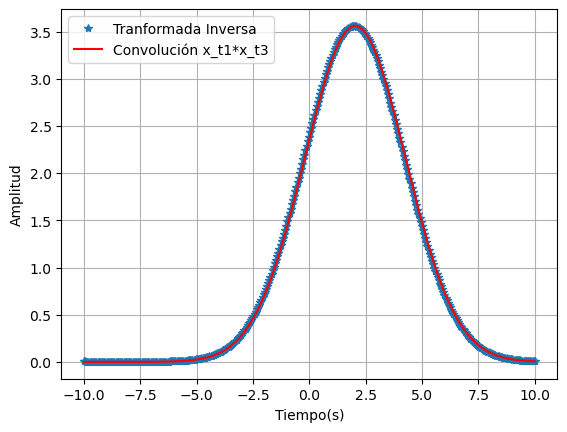

In [14]:
#Definimos la nueva señal gaussiana
sigma1=2
f_t3 = (1 / np.sqrt(2 * np.pi * sigma1**2)) * np.exp(-(t - u)**2 / (2 * sigma1**2))

#Calculamos su convolución
conv=np.convolve(f_t1,f_t3,mode='same')

#Calculamos las transformadas de fourier de f_t1 y f_t3
X_1=np.fft.fft(f_t1)
X_3=np.fft.fft(f_t3)

#Ahora multiplicamos sus transformadas
Y=X_1*X_3
#Ahora hallamos la transformada inversa de la multiplicación
y_t=np.fft.fftshift(np.fft.ifft(Y))



#Ploteamos la comparación entre la convolución y la transformada inversa de la muliplicación
plt.plot(t,y_t,'*',label='Tranformada Inversa')
plt.plot(t, conv,'r', label='Convolución x_t1*x_t3')
plt.xlabel('Tiempo(s)')
plt.ylabel('Amplitud')
plt.grid('on')
plt.legend(loc='upper left')
plt.show()

Como podemos notar existe la semejanza gráficamente ya que las gráficas se encuentran superpuestas debido al mismo resultado , con esto verificamos gráficamente una de las principales propiedades de la transformada de fourier.

Pregunta 3)

Parte a)

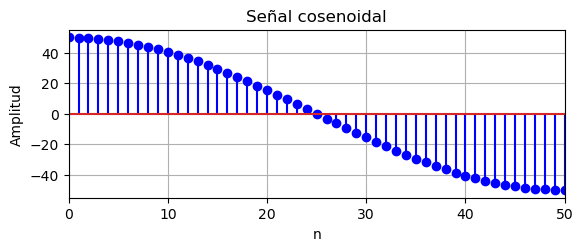

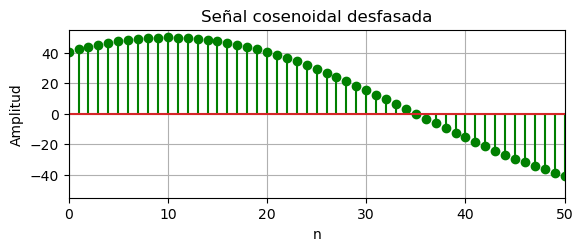

In [27]:
#Definimos nuestro vector de n , las cuales serán las muestras
n=np.arange(-250,250,1)

#Definimos las señales , una es la cosenoidal y la otra es la misma pero con un cierto desfase
x1=50*np.cos(2*np.pi*n/100)
x2=50*np.cos(2*np.pi*n/100 - 2*np.pi/10)

#Ploteamos ambas señales
plt.subplot(2,1,1)
plt.title("Señal cosenoidal")
plt.stem(n,x1,'b')
plt.grid('on')
plt.xlabel('n')
plt.ylabel('Amplitud')
plt.xlim([0,50])
plt.show()

plt.subplot(2,1,1)
plt.title("Señal cosenoidal desfasada")
plt.stem(n,x2,'g')
plt.grid('on')
plt.xlabel('n')
plt.ylabel('Amplitud')
plt.xlim([0,50])
plt.show()


Podemos apreciar de ambas gráficas que una se encuentra desfasada respecto a la otra, como podemos ver la primera gráfica para un valor de n=25 cruza por cero mientras que la siguiente gráfica para un valor igual a 34.

Parte b)

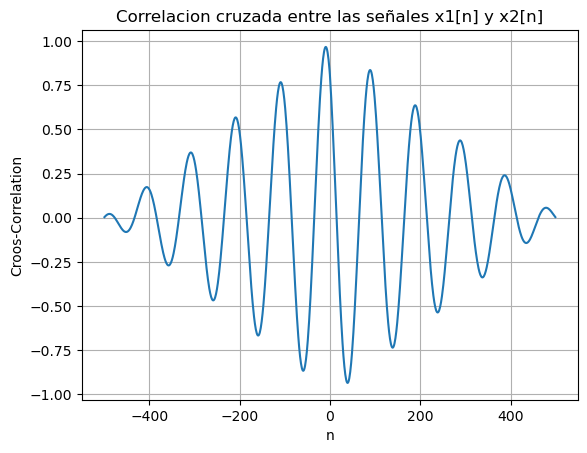

In [17]:
#Hallamos la correlación cruzada entre ambas señales
rxy=np.correlate(x1,x2,mode='full')

#Definimos el numero de muestras
N=len(n)
#Definimos el vector n_corr
n_corr=np.arange(-N+1,N)

#Normalizamos la correlación cruzada
p_1=np.sum(x1**2)
p_2=np.sum(x2**2)

#Correlación cruzada normalizada
rxy_norm=rxy/(np.sqrt(p_1*p_2))

#Ploteamos la correlación cruzada de x1 con x2
plt.title("Correlacion cruzada entre las señales x1[n] y x2[n]")
plt.plot(n_corr,rxy_norm)
plt.xlabel("n")
plt.ylabel("Croos-Correlation")
plt.grid('on')
plt.show()


Obtenemos el gráfico de nuestra correlación cruzada entre las dos señales x1 y x2, en este caso la gráfica es la correlación normalizada.

Parte c)

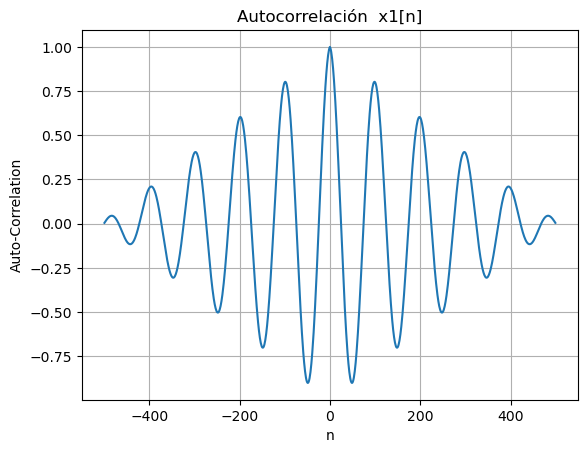

In [18]:
#Hallamos la autocorrelación entre x1 consigo misma
rxx=np.correlate(x1,x1,mode='full')
#Definimos el numero de muestras
N=len(n)
#Definimos el vector n_autocorr
n_autocorr=np.arange(-N+1,N)

#Normalizamos la autocorrelación 
p_1=np.sum(x1**2)


#Autocorrelación normalizada
rxx_norm=rxx/(np.sqrt(p_1*p_1))

#Ploteamos la autocorrelación  de x1[n]
plt.title("Autocorrelación  x1[n]")
plt.plot(n_autocorr,rxx_norm)
plt.xlabel("n")
plt.ylabel("Auto-Correlation")
plt.grid('on')
plt.show()

Obtenemos el gráfico de nuestra autocorrelación de x1 consigo misma, en este caso la gráfica es la autocorrelación normalizada.La autocorrelación tiene el valor de 1 cuando n=0 , esto es debido a que en ese instante las señales se encuentran superpuestas y a partir de ellos se procede a calcular la autocorrelación.

Parte d)

Para poder el desfase tanto en muestras como en radianes entre x1 y x2 debemos hallar el indice donde obtenemos el valor maximo de nuestra correlación cruzada entre las señales x1 y x2, asimismo tambien debemos obtener el indice donde se obtiene el valor máximo de la autocorrelación de x1.Pues la diferencia de estos indices será el desfase en muestras

In [22]:
#Definimos los valores de los indices
n_max_corr=np.argmax(rxy)
n_max_autocorr=np.argmax(rxx)

#Calculamos el desfase
n_desfase=np.abs(n_max_corr-n_max_autocorr)
print(f"Número de muestras en desfase: {n_desfase}")

#Calculamos el desfase en radianes
rad_desfase=2*np.pi*n_desfase/100
print(f"Desfase en radianes: {rad_desfase}")

Número de muestras en desfase: 9
Desfase en radianes: 0.5654866776461628


Como podemos observar en la gráfica de nuestro primer inciso , la gráfica en azul (señal cosenoidal) para por 0 cuando nuestro n=25, sin embargo en la gráfica en verde (coseno desfasada) podemos apreciar que cuando pasa por 0 es para un n=34 aproximadamente, si nosotros restamos ambos valores podriamos comprobar el valor del desfase en muestras, el cual es igual a 9.

De igual manera para verificar nuestro valor de desfase en gráfica de la señal cosenoidal, podemos ver que para nuestro periodo 2*pi existen 100 muestras , entonces sabiendo que nuestro desfase es igual a 9 muestras, entonces podemos hallar por regla de 3 simple que desf_rad=9x2xpi/100=0,5654 rad.